In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import simfin as sf # API for extracting company fundamentals from simfin.com website
from simfin.names import *

import yfinance as yf  # API for extracting historical stock market data from Yahoo! finance

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [2]:
random_10_stock = pd.read_csv(r'C:\Users\user\Desktop\2021 Spring\ORIE5370\project\random 10 stock info.csv')
random_10_stock = random_10_stock.set_index(["Ticker", "Report Date"])
random_10_stock

Return on assets  Return on equity  Earnings per share   \
Ticker Report Date                                                            
AAL    2015-03-31            0.01993           0.33719              1.33828   
       2015-06-30            0.03560           0.46865              2.47413   
       2015-09-30            0.03475           0.45003              2.55791   
       2015-12-31            0.06777           0.58225              5.23652   
       2016-03-31            0.01403           0.14862              1.15465   
...                              ...               ...                  ...   
V      2019-12-31            0.04375           0.09277              1.51394   
       2020-03-31            0.04235           0.08917              1.43359   
       2020-06-30            0.03047           0.06680              1.10979   
       2020-09-30            0.02641           0.05902              1.00317   
       2020-12-31            0.03887           0.08296              1.45921   

                    Operating profitability       Accruals  \
Ticker Report Date                                           
AAL    2015-03-31               1.184000e+10  4.758000e+09   
       2015-06-30               1.276900e+10  4.994000e+09   
       2015-09-30               1.270200e+10  4.989000e+09   
       2015-12-31               1.186200e+10  5.102000e+09   
       2016-03-31               1.127500e+10  5.440000e+09   
...                                      ...           ...   
V      2019-12-31               8.092000e+09  8.611000e+09   
       2020-03-31               7.784000e+09  5.869000e+09   
       2020-06-30               6.675000e+09  7.134000e+09   
       2020-09-30               7.060000e+09  4.571000e+09   
       2020-12-31               7.356000e+09  5.918000e+09   

                    Cash-based operating profitability  
Ticker Report Date                                      
AAL    2015-03-31                         7.082000e+09  
       2015-06-30                         7.775000e+09  
       2015-09-30                         7.713000e+09  
       2015-12-31                         6.760000e+09  
       2016-03-31                         5.835000e+09  
...                                                ...  
V      2019-12-31                        -5.190000e+08  
       2020-03-31                         1.915000e+09  
       2020-06-30                        -4.590000e+08  
       2020-09-30                         2.489000e+09  
       2020-12-31                         1.438000e+09  

[240 rows x 6 columns]

In [3]:
date = random_10_stock.index.get_level_values(1).unique()
# new dataframe to store moving average of fundamentals
moving_average = random_10_stock[random_10_stock.index.get_level_values(1) >= date[3]].copy()
for ticker in random_10_stock.index.get_level_values(0).unique():
    for i in range(3, len(date)):
        moving_average.loc[ticker].loc[date[i]] = (random_10_stock.loc[ticker].loc[date[i]] \
                                                   + random_10_stock.loc[ticker].loc[date[i - 1]] \
                                                   + random_10_stock.loc[ticker].loc[date[i - 2]] \
                                                   + random_10_stock.loc[ticker].loc[date[i - 3]]) / 4

In [4]:
moving_average

Return on assets  Return on equity  Earnings per share   \
Ticker Report Date                                                            
AAL    2015-12-31           0.039513          0.459530             2.901710   
       2016-03-31           0.038038          0.412388             2.855803   
       2016-06-30           0.033790          0.350305             2.659117   
       2016-09-30           0.028708          0.279757             2.370315   
       2016-12-31           0.013175          0.153282             1.201593   
...                              ...               ...                  ...   
V      2019-12-31           0.043045          0.088865             1.418525   
       2020-03-31           0.042980          0.089443             1.438665   
       2020-06-30           0.039563          0.083990             1.361673   
       2020-09-30           0.035745          0.076940             1.265122   
       2020-12-31           0.034525          0.074487             1.251440   

                    Operating profitability       Accruals  \
Ticker Report Date                                           
AAL    2015-12-31               1.229325e+10  4.960750e+09   
       2016-03-31               1.215200e+10  5.131250e+09   
       2016-06-30               1.202475e+10  5.309500e+09   
       2016-09-30               1.205200e+10  5.380250e+09   
       2016-12-31               1.206550e+10  5.433750e+09   
...                                      ...           ...   
V      2019-12-31               7.937500e+09  6.687750e+09   
       2020-03-31               8.046750e+09  6.930250e+09   
       2020-06-30               7.772500e+09  7.346000e+09   
       2020-09-30               7.402750e+09  6.546250e+09   
       2020-12-31               7.218750e+09  5.873000e+09   

                    Cash-based operating profitability  
Ticker Report Date                                      
AAL    2015-12-31                         7.332500e+09  
       2016-03-31                         7.020750e+09  
       2016-06-30                         6.715250e+09  
       2016-09-30                         6.671750e+09  
       2016-12-31                         6.631750e+09  
...                                                ...  
V      2019-12-31                         1.249750e+09  
       2020-03-31                         1.116500e+09  
       2020-06-30                         4.265000e+08  
       2020-09-30                         8.565000e+08  
       2020-12-31                         1.345750e+09  

[210 rows x 6 columns]

In [5]:
df = pd.read_csv(r'C:\Users\user\Desktop\2021 Spring\ORIE5370\project\quarterly stock exp return.csv')
df = df.set_index(["Report Date"])
df

,AAL,AAPL,AMZN,BA,CVS,FB,JNJ,SBUX,TSLA,V
Report Date,,,,,,,,,,
2015-03-31,-0.014410,0.127811,0.187412,0.154870,0.075130,0.054153,-0.032769,0.151849,-0.169370,-0.000333
2015-06-30,-0.288293,-0.003246,0.145116,-0.088229,0.013308,0.029947,-0.033315,0.112323,0.336594,0.023810
2015-09-30,-0.020437,-0.113232,0.169276,-0.049774,-0.077204,0.045243,-0.036560,0.060459,-0.051738,0.043381
2015-12-31,0.077496,-0.030234,0.299796,0.118434,0.029916,0.182806,0.103050,0.075346,-0.026450,0.121587
2016-03-31,-0.040642,0.021189,-0.151474,-0.135638,0.054650,0.072717,0.049718,-0.015571,-0.036144,-0.022543
2016-06-30,-0.365105,-0.126222,0.172916,0.017549,-0.076685,-0.003556,0.110702,-0.044453,-0.064511,-0.031806
2016-09-30,0.273204,0.179978,0.152240,0.043591,-0.053042,0.112951,-0.003352,-0.042093,-0.028830,0.074176
2016-12-31,0.263364,0.036475,-0.098812,0.177213,-0.119659,-0.105689,-0.010667,0.041952,0.061735,-0.045946
2017-03-31,-0.098078,0.223282,0.170127,0.138317,0.000832,0.214212,0.085910,0.055783,0.268434,0.134242


## Factor Model

In [6]:
f = pd.DataFrame(columns = moving_average.columns.tolist(), index = date[3:])
f

,Return on assets,Return on equity,Earnings per share,Operating profitability,Accruals,Cash-based operating profitability
Report Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# test how to get x
moving_average[moving_average.index.get_level_values(1) == "2015-12-31"]

,,Return on assets,Return on equity,Earnings per share,Operating profitability,Accruals,Cash-based operating profitability
Ticker,Report Date,,,,,,
AAL,2015-12-31,0.039513,0.459530,2.901710,1.229325e+10,4.960750e+09,7.332500e+09
AAPL,2015-12-31,0.047988,0.106622,0.592392,6.453525e+10,5.329975e+10,1.123550e+10
AMZN,2015-12-31,0.002363,0.011237,0.318283,3.503200e+10,2.411750e+10,1.091450e+10
BA,2015-12-31,0.013262,0.188467,1.880718,2.574250e+10,2.439325e+10,1.349250e+09
CVS,2015-12-31,0.015815,0.035248,1.171760,4.258575e+10,2.011725e+10,2.246850e+10
FB,2015-12-31,0.019735,0.022085,0.326535,6.691000e+09,1.750250e+09,4.940750e+09
JNJ,2015-12-31,0.029275,0.054813,1.389415,2.508075e+10,1.985175e+10,5.229000e+09
SBUX,2015-12-31,0.048748,0.104098,0.412520,7.000300e+09,2.330200e+09,4.670100e+09
TSLA,2015-12-31,-0.030958,-0.228618,-0.345137,1.421539e+09,1.185201e+09,2.363385e+08


In [8]:
# test how to get y
df.loc["2015-12-31"]

AAL     0.077496
AAPL   -0.030234
AMZN    0.299796
BA      0.118434
CVS     0.029916
FB      0.182806
JNJ     0.103050
SBUX    0.075346
TSLA   -0.026450
V       0.121587
Name: 2015-12-31, dtype: float64

In [9]:
# fit model
from sklearn import linear_model
reg = linear_model.LinearRegression()
for date in f.index.tolist():
    reg.fit(moving_average[moving_average.index.get_level_values(1) == date], df.loc[date])
    f.loc[date] = reg.coef_
f

,Return on assets,Return on equity,Earnings per share,Operating profitability,Accruals,Cash-based operating profitability
Report Date,,,,,,
2015-12-31,-1.56479,0.571702,-0.0767487,2.08076e-05,-2.08076e-05,-2.08076e-05
2016-03-31,3.87189,-0.893269,0.093795,4.66106e-05,-4.66106e-05,-4.66106e-05
2016-06-30,7.15627,-2.72445,0.256311,0.000250579,-0.000250579,-0.000250579
2016-09-30,0.818972,-0.168788,0.091616,1.80103e-05,-1.80103e-05,-1.80103e-05
2016-12-31,-1.53177,0.293791,-0.0192347,-2.09391e-05,2.09391e-05,2.09391e-05
2017-03-31,0.043275,0.0204349,-0.0855582,-8.46703e-07,8.46706e-07,8.46699e-07
2017-06-30,-3.41162,0.00647607,-0.0084563,8.55944e-05,-8.55944e-05,-8.55944e-05
2017-09-30,0.979571,0.052322,0.0340414,4.11554e-05,-4.11554e-05,-4.11554e-05
2017-12-31,-0.833002,-0.137781,0.19846,-2.89612e-06,2.89612e-06,2.8961e-06


In [10]:
# new dataframe to store predictions
expected_return = pd.DataFrame(columns = df.columns.tolist(), index = f.index)
expected_return

,AAL,AAPL,AMZN,BA,CVS,FB,JNJ,SBUX,TSLA,V
Report Date,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for ticker in expected_return.columns.tolist():
    expected_return[ticker] = (moving_average.loc[ticker] * f).sum(axis = 1)
expected_return

,AAL,AAPL,AMZN,BA,CVS,FB,JNJ,SBUX,TSLA,V
Report Date,,,,,,,,,,
2015-12-31,-0.021330,-0.096053,-0.034597,-0.076372,-0.097038,-0.041692,-0.134042,-0.047442,-0.056589,-0.083051
2016-03-31,0.058945,0.105985,0.064502,0.010248,0.171443,0.124134,0.191513,0.143608,0.065105,0.158272
2016-06-30,-0.038942,0.211656,0.230744,0.210465,0.260214,0.263739,0.415800,0.155878,0.266084,0.221239
2016-09-30,0.171875,0.127690,0.085113,0.154472,0.042512,0.061225,0.157543,0.046275,-0.017992,0.072488
2016-12-31,-0.039170,-0.097549,-0.127474,0.138984,-0.189188,-0.113885,-0.095621,-0.083757,-0.005584,-0.043591
2017-03-31,-0.098295,0.077646,-0.095962,-0.046841,-0.137263,-0.108960,-0.094165,-0.053313,0.025337,-0.031034
2017-06-30,-0.070358,-0.220520,-0.125533,-0.106545,-0.168654,-0.206839,-0.152326,-0.196463,0.022321,-0.102196
2017-09-30,0.043964,0.089882,0.048787,0.292690,0.043246,0.088486,0.091103,0.067598,-0.027684,0.055826
2017-12-31,0.075679,0.136647,0.089338,0.143646,-0.050219,0.050292,0.013082,-0.007024,-0.080258,0.119487


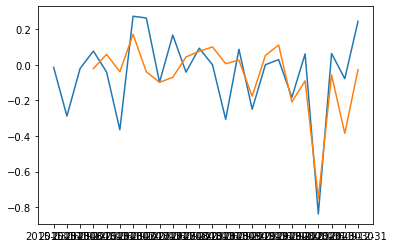

In [12]:
# check the prediction
plt.plot(df.index, df["AAL"])
plt.plot(expected_return.index, expected_return["AAL"])

In [13]:
# test covariance matrix
covariance = df.loc["2015-03-31":"2015-12-31"].cov()
covariance

,AAL,AAPL,AMZN,BA,CVS,FB,JNJ,SBUX,TSLA,V
AAL,0.024886,-0.000698,0.008155,0.013903,0.000501,0.007666,0.006278,-0.001801,-0.030041,0.004416
AAPL,-0.000698,0.009997,-0.000321,0.007592,0.005864,-0.000784,-0.001018,0.003936,-0.005220,-0.002606
AMZN,0.008155,-0.000321,0.004691,0.005396,0.001222,0.004801,0.004549,-0.000858,-0.005809,0.003141
BA,0.013903,0.007592,0.005396,0.014566,0.005485,0.004861,0.003958,0.001997,-0.019832,0.001238
CVS,0.000501,0.005864,0.001222,0.005485,0.004085,0.001077,0.000999,0.002125,-0.001986,-0.000453
FB,0.007666,-0.000784,0.004801,0.004861,0.001077,0.004978,0.004793,-0.001039,-0.004405,0.003393
JNJ,0.006278,-0.001018,0.004549,0.003958,0.000999,0.004793,0.004713,-0.001068,-0.002169,0.003381
SBUX,-0.001801,0.003936,-0.000858,0.001997,0.002125,-0.001039,-0.001068,0.001671,-0.000645,-0.001479
TSLA,-0.030041,-0.005220,-0.005809,-0.019832,-0.001986,-0.004405,-0.002169,-0.000645,0.047792,-0.000528
V,0.004416,-0.002606,0.003141,0.001238,-0.000453,0.003393,0.003381,-0.001479,-0.000528,0.002785


In [14]:
mu = expected_return.loc["2015-12-31"]
mu

AAL    -0.021330
AAPL   -0.096053
AMZN   -0.034597
BA     -0.076372
CVS    -0.097038
FB     -0.041692
JNJ    -0.134042
SBUX   -0.047442
TSLA   -0.056589
V      -0.083051
Name: 2015-12-31, dtype: float64

Long only Markowitz (Lec 3 page 4 with constraint on w)
\begin{equation*}
    \text{maximize } \mu^T w - \frac{1}{2}\gamma w^T \Sigma w\\
    \text{subject to }\textbf{1}^T w = 1,w \ge 0,
\end{equation*}

In [46]:
from cvxpy import *
w = Variable(len(mu))
# gamma value can be changed
gamma = Parameter(nonneg=True)
gamma.value = 1
mu = np.array(mu).reshape((len(mu), 1))
ret = mu.T @ w
risk = quad_form(w, covariance)
objective = Maximize(ret - 1/2 * gamma * risk)
prob = Problem(objective, [sum(w) == 1, w >= 0])
result = prob.solve()
print(w.value)
print(ret.value)

[ 6.19949786e-23 -2.03775518e-23  1.03682891e-22 -1.75565001e-23
 -4.95918681e-24 -1.92266496e-23 -1.37316732e-23  1.00000000e+00
  3.68136340e-23  9.48109274e-23]
[-0.00814563]


In [47]:
risk_data = [] # sd
ret_data = [] # portfolio return
for i in range(3, len(df.index)):
    date = df.index[i]
    mu = expected_return.loc[date]
    mu = np.array(mu).reshape((len(mu), 1))
    covariance = df.loc[df.index[i-3]:date].cov()
    w = Variable(len(mu))
    ret = mu.T @ w
    risk = quad_form(w, covariance)
    objective = Maximize(ret - gamma * risk)
    prob = Problem(objective, [sum(w) == 1, w >= 0])
    result = prob.solve()
    risk_data.append(sqrt(risk).value)
    ret_data.append(ret.value)

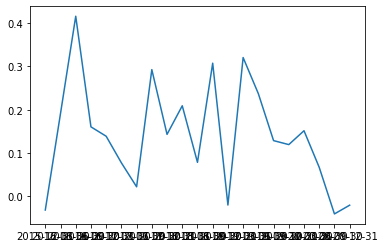

In [48]:
plt.plot(expected_return.index, ret_data)

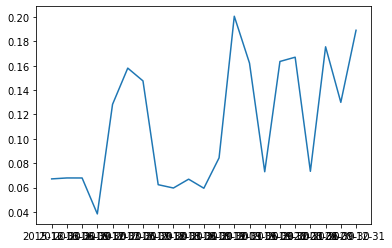

In [49]:
plt.plot(expected_return.index, risk_data)